Выберем для дальнейшей работы [бета](https://ru.wikipedia.org/wiki/Бета-распределение)-распределение

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

Сделаем выброку в 1000 элементов из бета распределения с параметрами $\alpha = 2$, $\beta = 5$

In [2]:
a = 2.
b = 5.
beta_rv = sts.beta(a, b)
sample = beta_rv.rvs(1000)

Строим гистограмму и теоретическую плотность нашего распределения

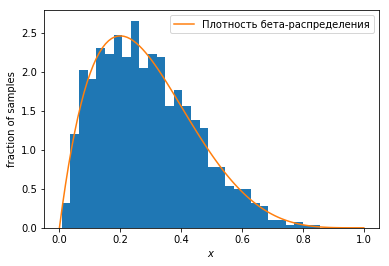

In [5]:
# Рисуем гистограмму
plt.hist(sample, bins=30, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# Поверх гистограммы строим теоретическую плотность  
x = np.linspace(0, 1, 100)
cdf = beta_rv.pdf(x)
plt.plot(x, cdf, label=u'Плотность бета-распределения')

plt.legend(bbox_to_anchor=(1, 1))

### Задача 
Будем оценивать распределение выборочного среднего случайной величины с бета распределением при разных объёмах выборок. 
Сгенерируем 1000 выборок объёма 5, 100, 1000

In [6]:
k = 1000
n1 = 5
n2 = 100
n3 = 1000
samples1 = [beta_rv.rvs(n1) for _ in range(k)]
samples2 = [beta_rv.rvs(n2) for _ in range(k)]
samples3 = [beta_rv.rvs(n3) for _ in range(k)]

Согласно википедии матожидание и дисперсия нашего распределения вычисляется по следующей формуле:

In [7]:
def e(a, b):
    return a/(a + b)

def d(a, b):
    return (a * b) / (((a + b) ** 2) * (a+b+1))

Построим гистограммы выборочных средних наших распределений и плотности распределения соответствующих нормальных распределений, которыми приближается распределение выборочных средних.

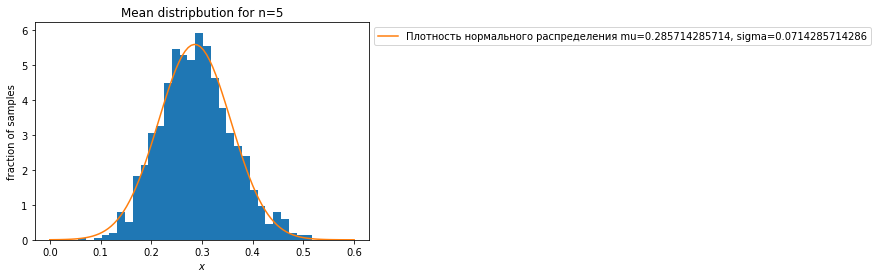

In [12]:
plt.hist([sum(s)/n1 for s in samples1], bins=30, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Mean distripbution for n={}'.format(n1))

# Поверх гистограммы строим плотность соответствующего нормального распределения  
x = np.linspace(0, 0.6, 100)

mu = e(a, b)
sigma = sqrt(d(a, b)/n1)
# плотность нормально распределенной случайной величины
cdf = sts.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, cdf, label=u'Плотность нормального распределения mu={}, sigma={}'.format(mu, sigma))
plt.legend(bbox_to_anchor=(1, 1))

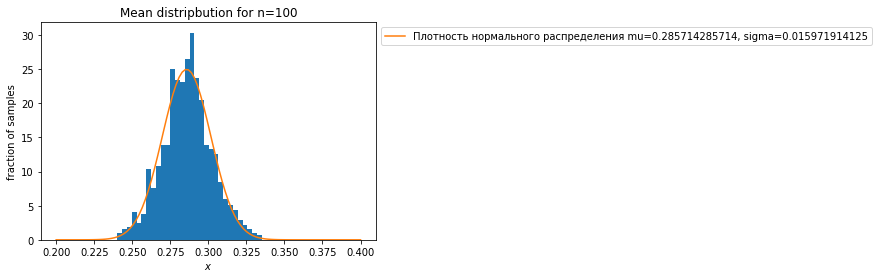

In [13]:
plt.hist([sum(s)/n2 for s in samples2], bins=30, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Mean distripbution for n={}'.format(n2))

# Поверх гистограммы строим плотность соответствующего нормального распределения  
x = np.linspace(0.2, 0.4, 100)

mu = e(a, b)
sigma = sqrt(d(a, b) / n2)
# плотность нормально распределенной случайной величины
cdf = sts.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, cdf, label=u'Плотность нормального распределения mu={}, sigma={}'.format(mu, sigma))
plt.legend(bbox_to_anchor=(1, 1))

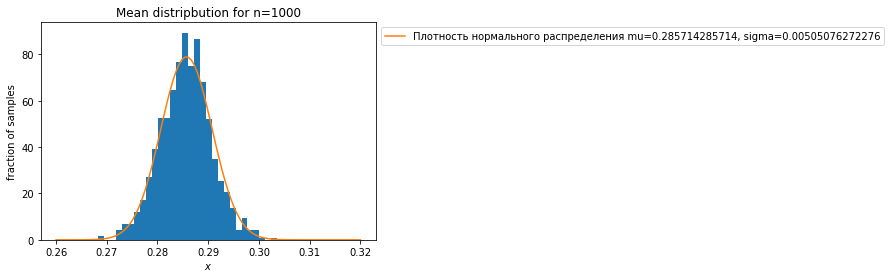

In [15]:
plt.hist([sum(s)/n3 for s in samples3], bins=30, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Mean distripbution for n={}'.format(n3))

# Поверх гистограммы строим плотность соответствующего нормального распределения  
x = np.linspace(0.26, 0.32, 100)

mu = e(a, b)
sigma = sqrt(d(a, b) / n3)
# плотность нормально распределенной случайной величины
cdf = sts.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, cdf, label=u'Плотность нормального распределения mu={}, sigma={}'.format(mu, sigma))
plt.legend(bbox_to_anchor=(1, 1))

### Выводы

Как видим, при увеличении n получаем выбоки с распределением средних близким к нормальному, с уменьшающейся дисперсией. Также с ростом n улучшается точность аппроксимации.